In [1]:

import pandas as pd

# Load the dataset
file_path ="F:\data analysis\sales_data_sample.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Check basic info
df.isnull().sum()
df.info()
#


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_12552\1527353539.py:4: SyntaxWarning: invalid escape sequence '\d'
  file_path ="F:\data analysis\sales_data_sample.csv"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [2]:
df.drop(columns=["ADDRESSLINE2","STATE","TERRITORY"],inplace=True)
df["POSTALCODE"].fillna("Unknown",inplace=True)
df.isnull().sum()


C:\Users\HP\AppData\Local\Temp\ipykernel_12552\2168447934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["POSTALCODE"].fillna("Unknown",inplace=True)


ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
POSTALCODE          0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [20]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,SALES PER UNIT,YEAR,MONTH
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,95.70,2003,2
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,81.35,2003,5
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,94.74,2003,7
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,83.26,2003,8
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,San Francisco,Unknown,USA,Brown,Julie,Medium,106.23,2003,10


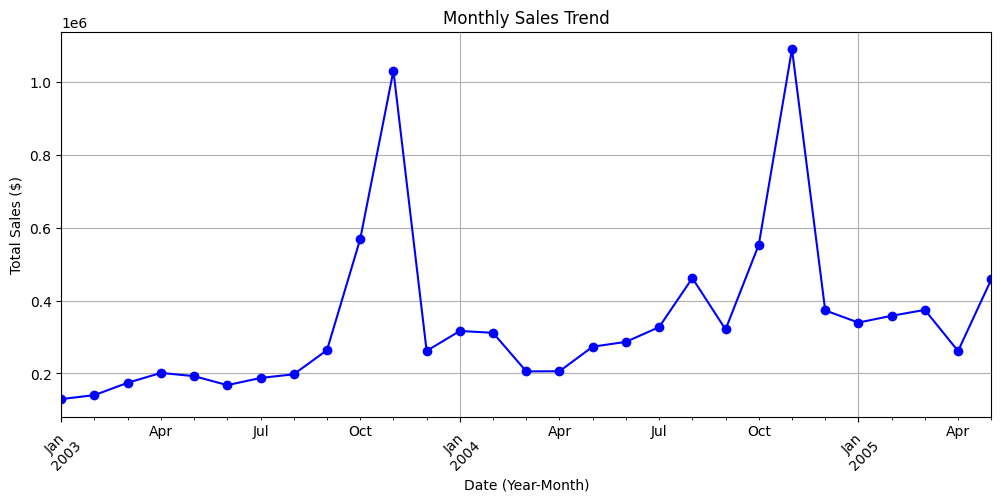

In [3]:
import matplotlib.pyplot as plt

# Convert ORDERDATE to datetime
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])

# Group sales by month and sum only numeric values
df_time_series = df.groupby(df["ORDERDATE"].dt.to_period("M"))["SALES"].sum()

# Plot sales trend over time
plt.figure(figsize=(12, 5))
df_time_series.plot(marker="o", linestyle="-", color="b")
plt.title("Monthly Sales Trend")
plt.xlabel("Date (Year-Month)")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_12552\2558710925.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_product_sales.index,y=df_product_sales.values,palette="viridis")


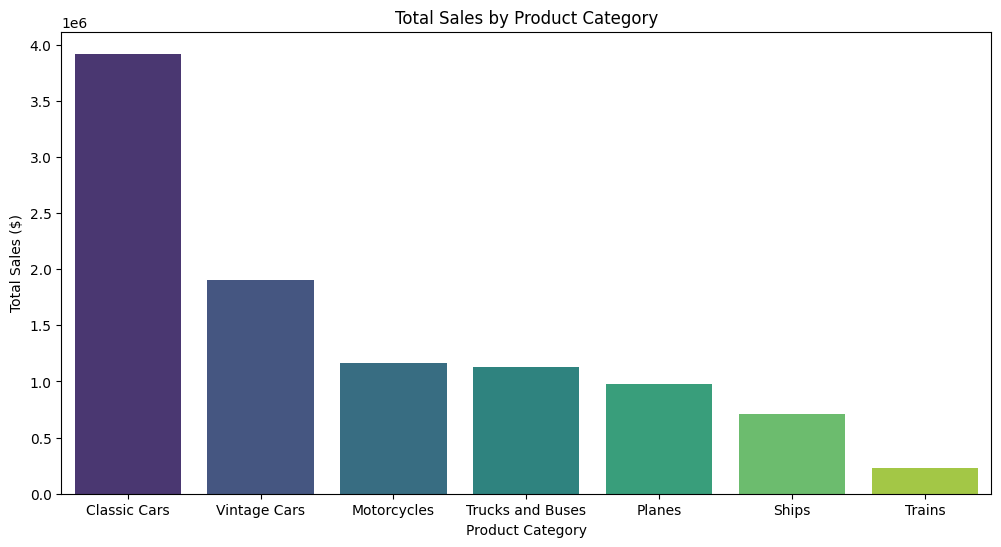

In [5]:
import seaborn as sns
df_product_sales=df.groupby("PRODUCTLINE")["SALES"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=df_product_sales.index,y=df_product_sales.values,palette="viridis")
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales ($)")
# plt.grid(axis="y")
plt.show()

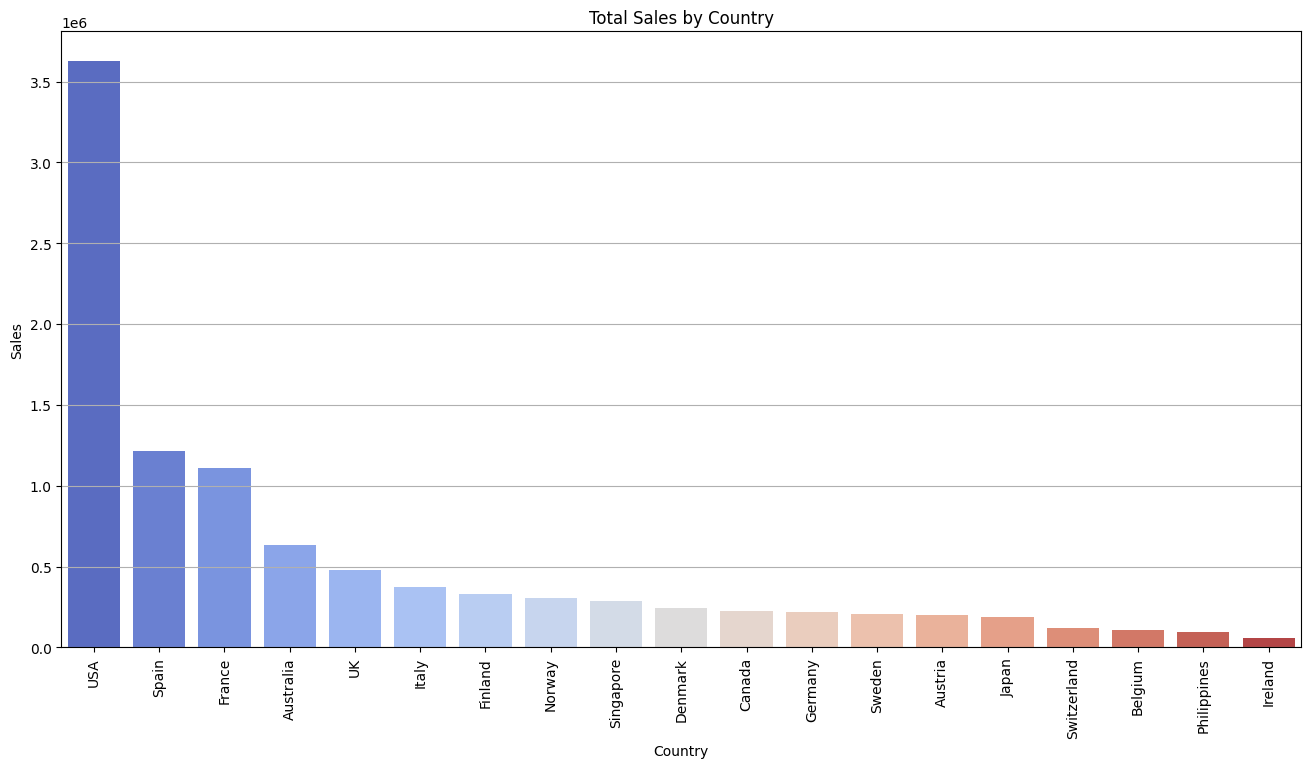

In [6]:
df_country_sales=df.groupby("COUNTRY")["SALES"].sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=df_country_sales.index,y=df_country_sales.values,palette="coolwarm" ,hue=df_country_sales.index)
plt.title("Total Sales by Country")
plt.xlabel("Country")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12552\3525924296.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_deal_sales.index, y=df_deal_sales.values, palette="pastel")


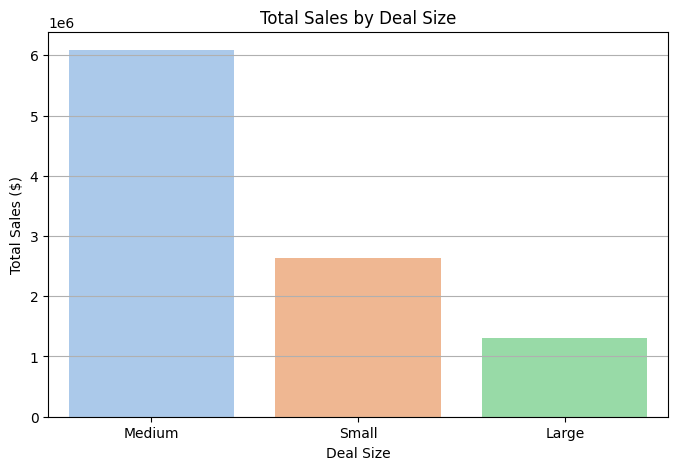

In [7]:
# Aggregate total sales by deal size
df_deal_sales = df.groupby("DEALSIZE")["SALES"].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=df_deal_sales.index, y=df_deal_sales.values, palette="pastel")
plt.title("Total Sales by Deal Size")
plt.xlabel("Deal Size")
plt.ylabel("Total Sales ($)")
plt.grid(axis="y")
plt.show()


In [28]:
df["SALES PER UNIT"]=df["SALES"]/df["QUANTITYORDERED"]

df["YEAR"]=df["ORDERDATE"].dt.year
df["MONTH"]=df["ORDERDATE"].dt.month

df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,SALES PER UNIT,YEAR,MONTH
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,95.70,2003,2
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,81.35,2003,5
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,94.74,2003,7
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,83.26,2003,8
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,San Francisco,Unknown,USA,Brown,Julie,Medium,106.23,2003,10


In [31]:
df_category_trend = df.groupby(["YEAR", "PRODUCTLINE"])["SALES"].sum().unstack()
df_category_trend

PRODUCTLINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
YEAR,,,,,,,
2003,1484785.29,370895.58,272257.60,244821.09,72802.29,420429.93,650987.76
2004,1762257.09,560545.23,502671.80,341437.97,116523.85,529302.89,911423.77
2005,672573.28,234947.53,200074.17,128178.07,36917.33,178057.02,340739.31


<Figure size 1200x600 with 0 Axes>

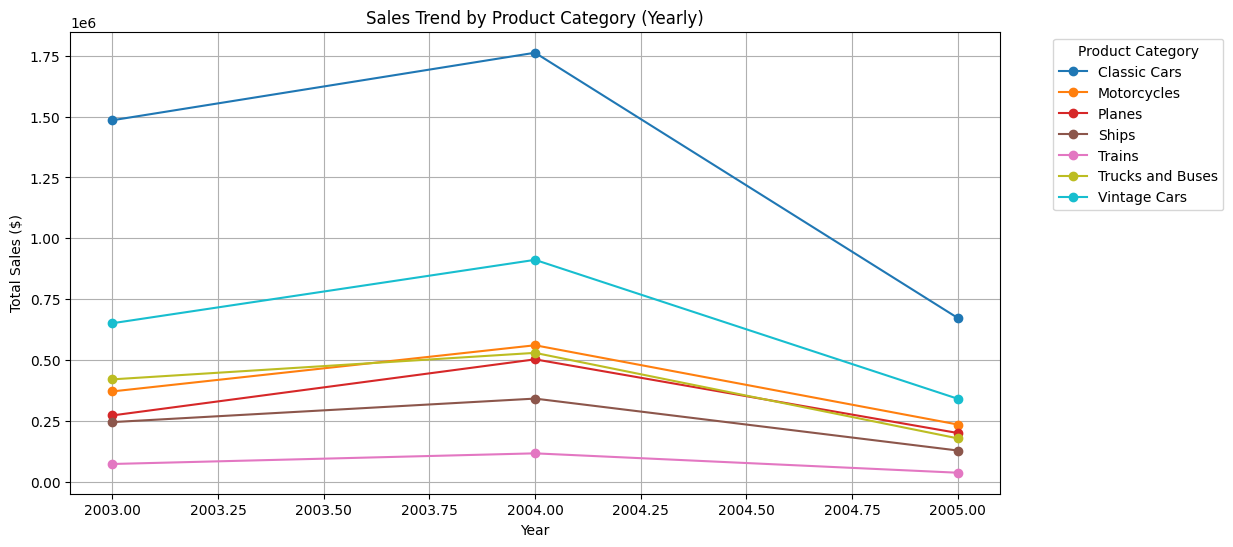

In [9]:
# Group sales by product line and year
df_category_trend = df.groupby(["YEAR", "PRODUCTLINE"])["SALES"].sum().unstack()

# Plot trends over time for each product category
plt.figure(figsize=(12, 6))
df_category_trend.plot(marker="o", linestyle="-", colormap="tab10", figsize=(12, 6))
plt.title("Sales Trend by Product Category (Yearly)")
plt.xlabel("Year")
plt.ylabel("Total Sales ($)")
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


In [32]:
df_country_trend=df.groupby(["YEAR","COUNTRY"])["SALES"].sum().unstack()
df_country_trend

COUNTRY,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
YEAR,,,,,,,,,,,,,,,,,,,
2003,253134.45,82117.88,3348.46,54609.50,99192.72,111154.51,312761.42,70053.31,NaN,140928.77,NaN,196532.6,78086.98,165686.20,405343.39,58459.92,NaN,180421.55,1305147.88
2004,232396.68,51694.39,80024.05,135776.09,120431.56,91575.69,555198.70,150418.78,57756.43,192235.60,149422.47,110931.1,15928.75,116039.03,483545.36,119947.57,117713.56,257656.10,1685470.69
2005,145091.97,68250.26,25040.11,33692.97,26012.87,126851.71,242956.40,NaN,NaN,41509.94,38745.34,NaN,NaN,6763.18,326798.17,31606.72,NaN,40802.81,637364.26


<Figure size 1400x700 with 0 Axes>

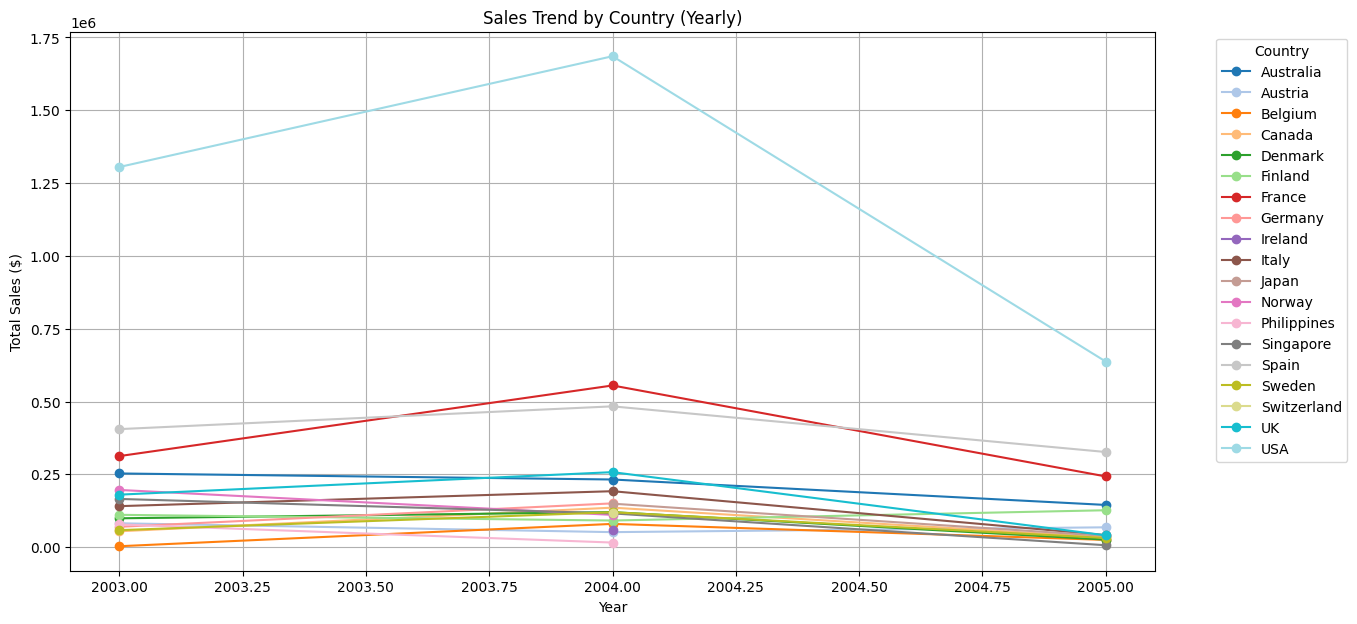

In [10]:
df_country_trend=df.groupby(["YEAR","COUNTRY"])["SALES"].sum().unstack()

plt.figure(figsize=(14,7))
df_country_trend.plot(marker="o",linestyle="-",colormap="tab20",figsize=(14,7))
plt.title("Sales Trend by Country (Yearly)")
plt.xlabel("Year")
plt.ylabel("Total Sales ($)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

df_yearly_sales=df.groupby("YEAR")["SALES"].sum().reset_index()

X = df_yearly_sales[["YEAR"]]  # Feature: Year
y = df_yearly_sales["SALES"]   # Target: Total Sales

# Show dataset structure
df_yearly_sales.head()

,YEAR,SALES
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


In [48]:
# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Train (fit) the model using training data
model.fit(X_train, y_train)

# Check model accuracy on training and testing sets
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

train_score, test_score


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


(1.0, nan)

In [49]:
# Create a new Linear Regression model
model = LinearRegression()

# Train (fit) the model using ALL data
model.fit(X, y)

# Predict sales for next year (latest year + 1)
next_year = np.array([[X["YEAR"].max() + 1]])  # Ensure correct shape
predicted_sales = model.predict(next_year.reshape(-1, 1))  # Reshape input

next_year[0][0], predicted_sales[0]


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(2006, 1618716.7866666317)

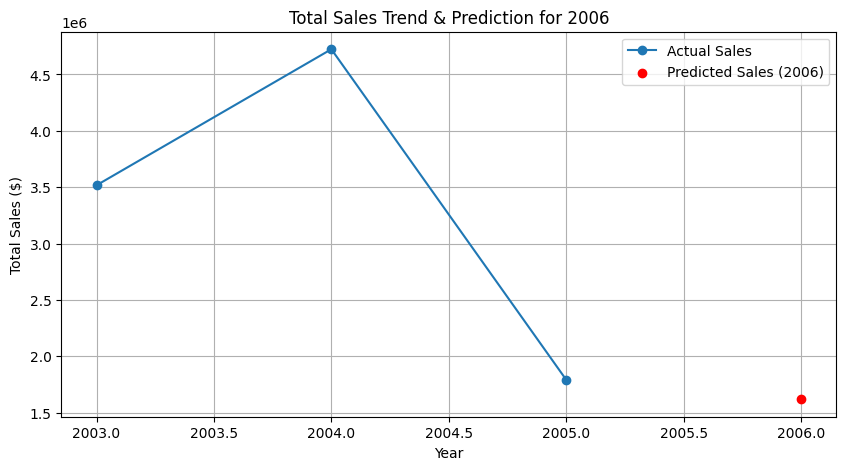

In [53]:
import matplotlib.pyplot as plt

# Plot actual sales data
plt.figure(figsize=(10, 5))
plt.plot(df_yearly_sales["YEAR"], df_yearly_sales["SALES"], marker="o", linestyle="-", label="Actual Sales")

# Plot the predicted sales for 2006
plt.scatter(next_year[0][0], predicted_sales[0], color="red", label="Predicted Sales (2006)", zorder=3)

# Add labels & title
plt.title("Total Sales Trend & Prediction for 2006")
plt.xlabel("Year")
plt.ylabel("Total Sales ($)")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_12552\3033636257.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_product_sales.values, y=df_product_sales.index, palette="viridis")
C:\Users\HP\AppData\Local\Temp\ipykernel_12552\3033636257.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_country_sales.index, y=df_country_sales.values, palette="coolwarm")
C:\Users\HP\AppData\Local\Temp\ipykernel_12552\3033636257.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_deal_sales.index, y=df_deal_sales.values, palette="pastel")


✅ Report saved successfully! Check the file: Sales_Analysis_Report.pdf


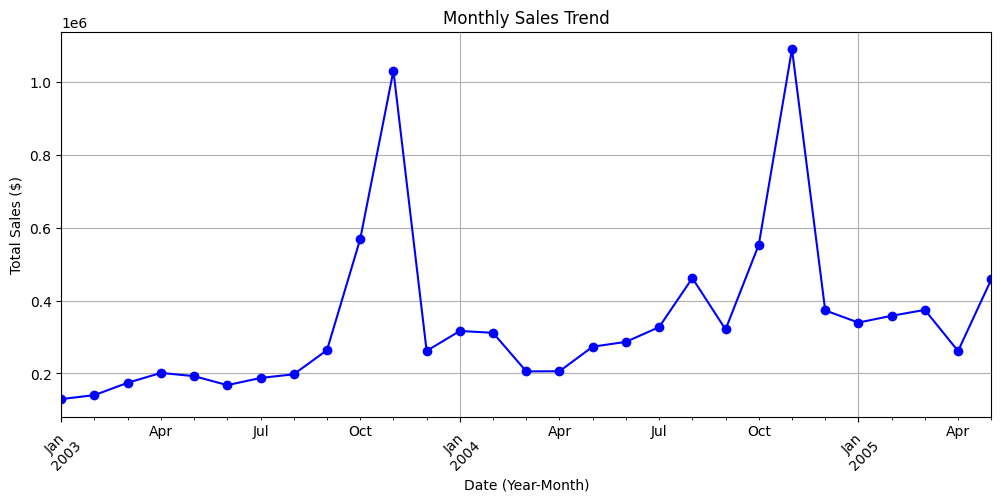

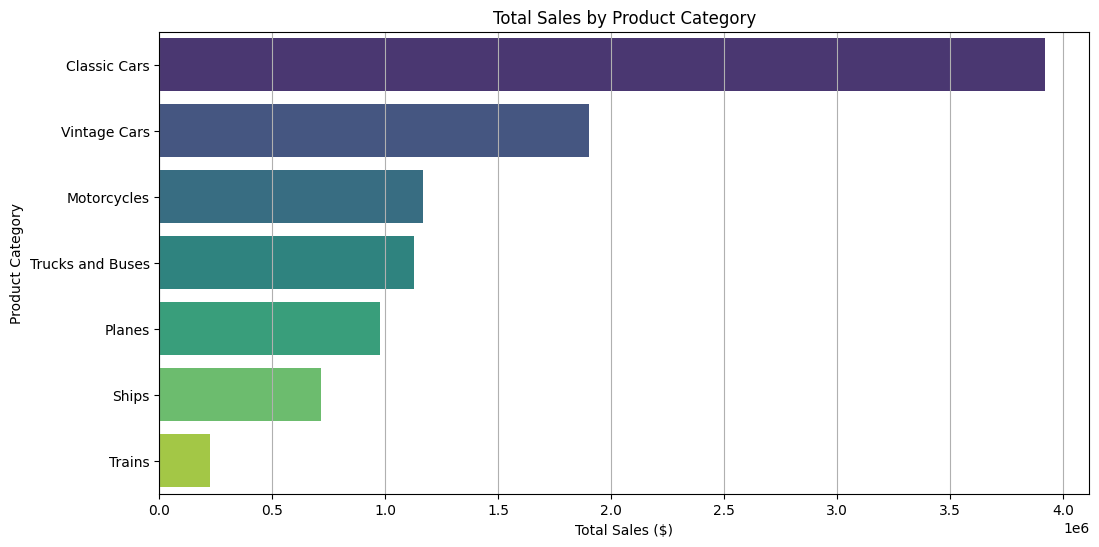

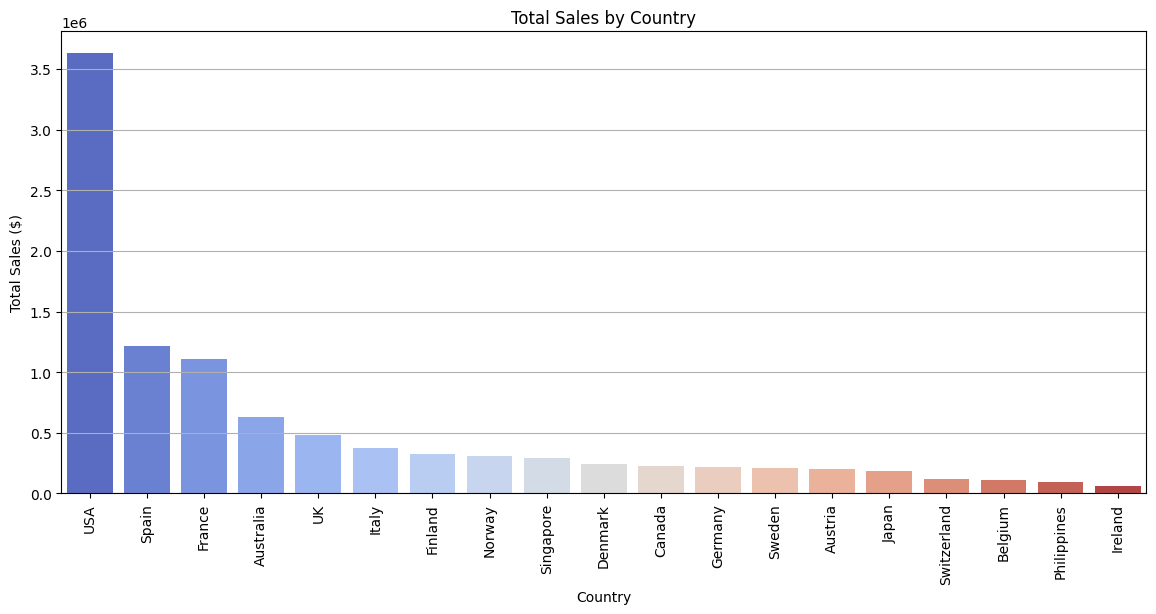

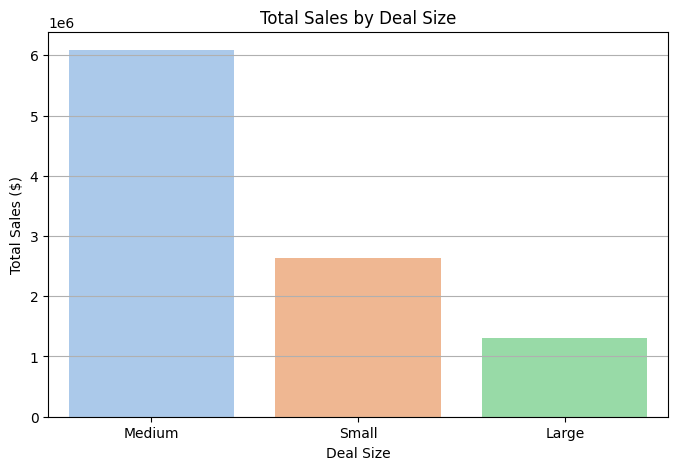

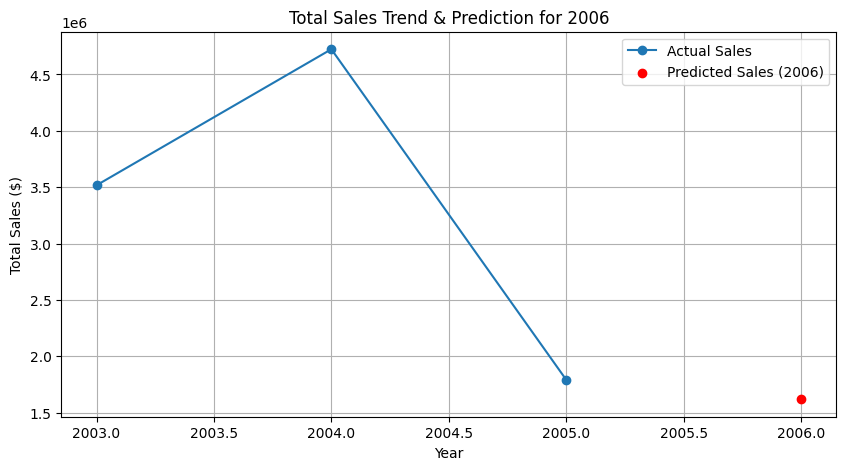

In [19]:
from fpdf import FPDF
import matplotlib.pyplot as plt
import seaborn as sns

# Create a PDF object
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

# Add a title page
pdf.add_page()
pdf.set_font("Arial", style="B", size=20)
pdf.cell(200, 10, "Sales Analysis & Prediction Report", ln=True, align="C")
pdf.ln(10)  # Add space
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, "This report presents an analysis of sales data, including trends, top-performing products, country-wise performance, and future sales predictions.")

# Add Key Insights
pdf.ln(5)
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, "Key Insights:", ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, 
    "1. Classic Cars have the highest sales, while Trains have the lowest.\n"
    "2. October shows a major spike in sales, indicating a seasonal effect.\n"
    "3. Austria and France grew rapidly but declined significantly after 2005.\n"
    "4. Medium deals contribute the highest revenue, not large deals.\n"
    "5. Vintage Cars showed the fastest growth trend over time.\n"
    "6. Predicted Sales for 2006: $1,618,716.79."
)

# Function to add an image to the PDF
def add_image_to_pdf(pdf, image_path, title):
    pdf.add_page()
    pdf.set_font("Arial", style="B", size=14)
    pdf.cell(0, 10, title, ln=True)
    pdf.ln(5)
    pdf.image(image_path, x=10, w=180)

# **Replot and Save Each Chart Before Adding to PDF**
# 1️⃣ Sales Trend Over Time
plt.figure(figsize=(12, 5))
df_time_series = df.groupby(df["ORDERDATE"].dt.to_period("M"))["SALES"].sum()
df_time_series.plot(marker="o", linestyle="-", color="b")
plt.title("Monthly Sales Trend")
plt.xlabel("Date (Year-Month)")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("sales_trend.png", bbox_inches="tight")  # Save chart
add_image_to_pdf(pdf, "sales_trend.png", "Monthly Sales Trend")

# 2️⃣ Top-Selling Product Categories
plt.figure(figsize=(12, 6))
df_product_sales = df.groupby("PRODUCTLINE")["SALES"].sum().sort_values(ascending=False)
sns.barplot(x=df_product_sales.values, y=df_product_sales.index, palette="viridis")
plt.title("Total Sales by Product Category")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Category")
plt.grid(axis="x")
plt.savefig("product_sales.png", bbox_inches="tight")  # Save chart
add_image_to_pdf(pdf, "product_sales.png", "Total Sales by Product Category")

# 3️⃣ Sales by Country
plt.figure(figsize=(14, 6))
df_country_sales = df.groupby("COUNTRY")["SALES"].sum().sort_values(ascending=False)
sns.barplot(x=df_country_sales.index, y=df_country_sales.values, palette="coolwarm")
plt.title("Total Sales by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.savefig("country_sales.png", bbox_inches="tight")  # Save chart
add_image_to_pdf(pdf, "country_sales.png", "Total Sales by Country")

# 4️⃣ Impact of Deal Size on Sales
plt.figure(figsize=(8, 5))
df_deal_sales = df.groupby("DEALSIZE")["SALES"].sum().sort_values(ascending=False)
sns.barplot(x=df_deal_sales.index, y=df_deal_sales.values, palette="pastel")
plt.title("Total Sales by Deal Size")
plt.xlabel("Deal Size")
plt.ylabel("Total Sales ($)")
plt.grid(axis="y")
plt.savefig("deal_size.png", bbox_inches="tight")  # Save chart
add_image_to_pdf(pdf, "deal_size.png", "Sales by Deal Size")

# 5️⃣ Sales Prediction for 2006
plt.figure(figsize=(10, 5))
plt.plot(df_yearly_sales["YEAR"], df_yearly_sales["SALES"], marker="o", linestyle="-", label="Actual Sales")
plt.scatter(next_year[0][0], predicted_sales[0], color="red", label="Predicted Sales (2006)", zorder=3)
plt.title("Total Sales Trend & Prediction for 2006")
plt.xlabel("Year")
plt.ylabel("Total Sales ($)")
plt.legend()
plt.grid(True)
plt.savefig("sales_prediction.png", bbox_inches="tight")  # Save chart
add_image_to_pdf(pdf, "sales_prediction.png", "Sales Trend & Prediction for 2006")

# Save the final report
pdf.output("F:/data analysis/Sales_Analysis_Report.pdf")


print("✅ Report saved successfully! Check the file: Sales_Analysis_Report.pdf")
